In [1]:
import csv

from plotting_helpers import *

## Performance Plots

### Sequential

In [2]:
df_seq_1 = get_sweep_dataframe('w1f4uxpq')  # initial sweep
df_seq_2 = get_sweep_dataframe('a4myvup0')  # small k sweep
df_seq_3 = get_sweep_dataframe('rdf2doxp')  # large k sweep
df_seq = pd.concat([df_seq_1, df_seq_2, df_seq_3]).reset_index()
df_seq.sort_values(['k', 'm'], inplace=True)
epochs = df_seq.epochs[0]

df_seq.head()

,index,run_id,name,state,k,m,p,lr,seed,device,...,preprocess_dataset,test_acc,test_loss,_timestamp,train_batch_loss,train_epoch_loss,_step,_wandb,_runtime,model_save_path
29,29,vdq3di67,cifar10_sequential_k=1_m=1_p=0.5_lr=0.0005_epo...,finished,1,1,0.5,0.0005,282,cuda,...,False,0.591591,30.921722,1.682438e+09,0.232046,22.202225,14899200,{'runtime': 474},469.286480,NaN
28,28,mcgsycvc,cifar10_sequential_k=1_m=8_p=0.5_lr=0.0005_epo...,finished,1,8,0.5,0.0005,282,cuda,...,False,0.597759,31.886695,1.682438e+09,0.240193,20.489722,14899200,{'runtime': 195},190.592686,NaN
27,27,q0quvf66,cifar10_sequential_k=1_m=64_p=0.5_lr=0.0005_ep...,finished,1,64,0.5,0.0005,282,cuda,...,False,0.594264,31.861868,1.682438e+09,0.251016,20.506617,14899200,{'runtime': 196},193.083843,NaN
26,26,g3n4un3n,cifar10_sequential_k=1_m=128_p=0.5_lr=0.0005_e...,finished,1,128,0.5,0.0005,282,cuda,...,False,0.598273,32.024158,1.682438e+09,0.205200,19.944481,14899200,{'runtime': 190},190.562366,NaN
25,25,6a0ljisl,cifar10_sequential_k=1_m=512_p=0.5_lr=0.0005_e...,finished,1,512,0.5,0.0005,282,cuda,...,False,0.595086,31.918552,1.682438e+09,0.220083,20.099668,14899200,{'runtime': 192},192.508841,NaN


In [3]:
# make k value table
k_list = []
for k in df_seq.k.unique():
    epochs_per_mask = k / BATCHES_PER_EPOCH
    if int(epochs_per_mask) == epochs_per_mask:
        epochs_per_mask = str(int(epochs_per_mask))  # these need to be strings because of the mixed types
    else:
        epochs_per_mask = f'{epochs_per_mask:.2f}'
    k_list.append({
        'k': k,
        'Training Epochs Per Subnet': epochs_per_mask,
        'Total Subnets': epochs * BATCHES_PER_EPOCH // k,
    })
k_table_df = pd.DataFrame(k_list).sort_values('k')


k_table_df.style.hide(axis='index')

k,Training Epochs Per Subnet,Total Subnets
1,0.01,29100
5,0.05,5820
15,0.15,1940
50,0.52,582
97,1,300
485,5,60
970,10,30
2425,25,12
4850,50,6
9700,100,3


In [4]:
print(k_table_df.style.hide(axis='index').to_latex(hrules=True))

\begin{tabular}{rlr}
\toprule
k & Training Epochs Per Subnet & Total Subnets \\
\midrule
1 & 0.01 & 29100 \\
5 & 0.05 & 5820 \\
15 & 0.15 & 1940 \\
50 & 0.52 & 582 \\
97 & 1 & 300 \\
485 & 5 & 60 \\
970 & 10 & 30 \\
2425 & 25 & 12 \\
4850 & 50 & 6 \\
9700 & 100 & 3 \\
29100 & 300 & 1 \\
\bottomrule
\end{tabular}



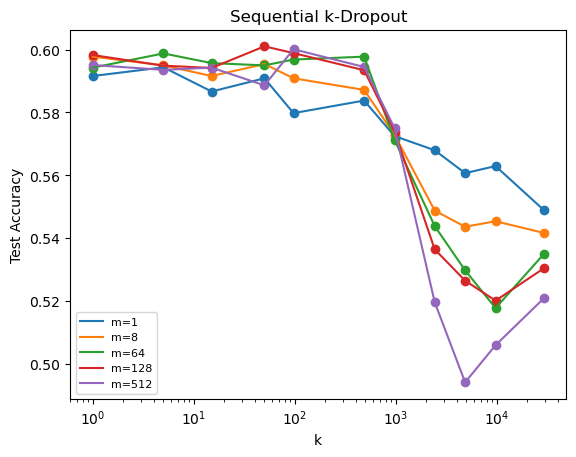

In [5]:
# plot for k
for m in df_seq.m.unique():
    df_filtered = df_seq[df_seq.m == m]
    plt.scatter(df_filtered.k, df_filtered.test_acc)
    plt.plot(df_filtered.k, df_filtered.test_acc, label=f'm={m}')

plt.xscale('log')
plt.title('Sequential k-Dropout')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.legend(fontsize=8, loc='lower left');

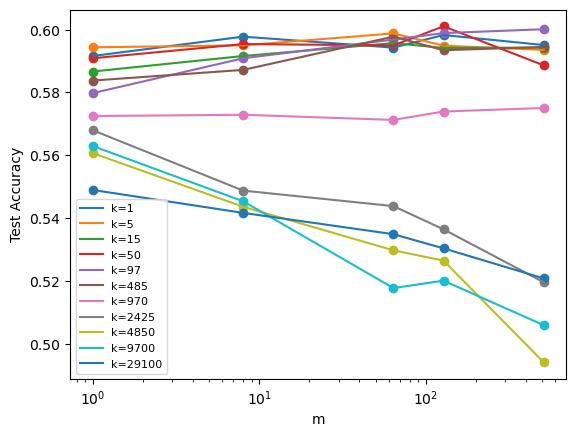

In [6]:
# plot for m
for k in df_seq.k.unique():
    df_filtered = df_seq[df_seq.k == k]
    plt.scatter(df_filtered.m, df_filtered.test_acc)
    plt.plot(df_filtered.m, df_filtered.test_acc, label=f'k={k}')

plt.xscale('log')
# plt.title('Sequential k-Dropout')
plt.xlabel('m')
plt.ylabel('Test Accuracy')
plt.legend(fontsize=8, loc='lower left');

### Pooled

In [7]:
df_pool = get_sweep_dataframe('v9lkgy3k')
df_pool = df_pool[df_pool.input_p == 0]  # filter for input_p of 0
df_pool.sort_values(['pool_size', 'm'], inplace=True)

df_pool.head()

,run_id,name,state,k,m,p,lr,seed,device,epochs,...,test_batch_size,preprocess_dataset,_runtime,test_acc,test_loss,_timestamp,train_batch_loss,train_epoch_loss,_step,_wandb
39,ul47kbdo,cifar10_pool_size=1_m=1_p=0.5_lr=0.0005_epochs...,finished,None,1,0.5,0.0005,282,cuda,300,...,512,False,455.279376,0.543586,47.008821,1.683053e+09,0.066920,4.368204,14899200,{'runtime': 459}
31,z4fbx7br,cifar10_pool_size=1_m=8_p=0.5_lr=0.0005_epochs...,finished,None,8,0.5,0.0005,282,cuda,300,...,512,False,191.516946,0.545127,46.568242,1.683055e+09,0.103613,6.690747,14899200,{'runtime': 191}
23,ks6brn7a,cifar10_pool_size=1_m=64_p=0.5_lr=0.0005_epoch...,finished,None,64,0.5,0.0005,282,cuda,300,...,512,False,190.369639,0.545127,46.568242,1.683055e+09,0.103613,6.690747,14899200,{'runtime': 190}
15,xzh4vj44,cifar10_pool_size=1_m=128_p=0.5_lr=0.0005_epoc...,finished,None,128,0.5,0.0005,282,cuda,300,...,512,False,467.278907,0.543586,47.008821,1.683056e+09,0.066920,4.368204,14899200,{'runtime': 466}
7,wsq537tt,cifar10_pool_size=1_m=512_p=0.5_lr=0.0005_epoc...,finished,None,512,0.5,0.0005,282,cuda,300,...,512,False,193.092711,0.545127,46.568242,1.683057e+09,0.103613,6.690747,14899200,{'runtime': 192}


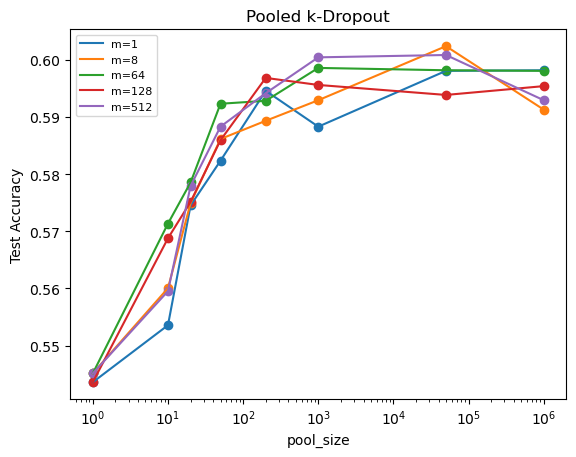

In [8]:
# plot for pool_size
for m in df_pool.m.unique():
    df_filtered = df_pool[df_pool.m == m]
    plt.scatter(df_filtered.pool_size, df_filtered.test_acc)
    plt.plot(df_filtered.pool_size, df_filtered.test_acc, label=f'm={m}')

plt.xscale('log')
plt.title('Pooled k-Dropout')
plt.xlabel('pool_size')
plt.ylabel('Test Accuracy')
plt.legend(fontsize=8);

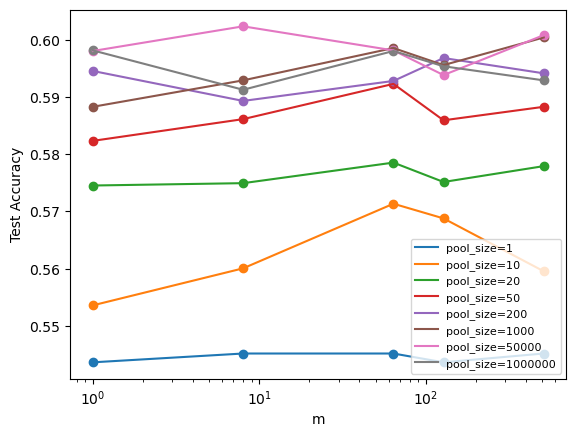

In [9]:
# plot for m
for pool_size in df_pool.pool_size.unique():
    df_filtered = df_pool[df_pool.pool_size == pool_size]
    plt.scatter(df_filtered.m, df_filtered.test_acc)
    plt.plot(df_filtered.m, df_filtered.test_acc, label=f'pool_size={pool_size}')

plt.xscale('log')
# plt.title('Pooled k-Dropout Sweep Over pool_size and m')
plt.xlabel('m')
plt.ylabel('Test Accuracy')
plt.legend(fontsize=8, loc='lower right');

### Sequential and Pooled Compared

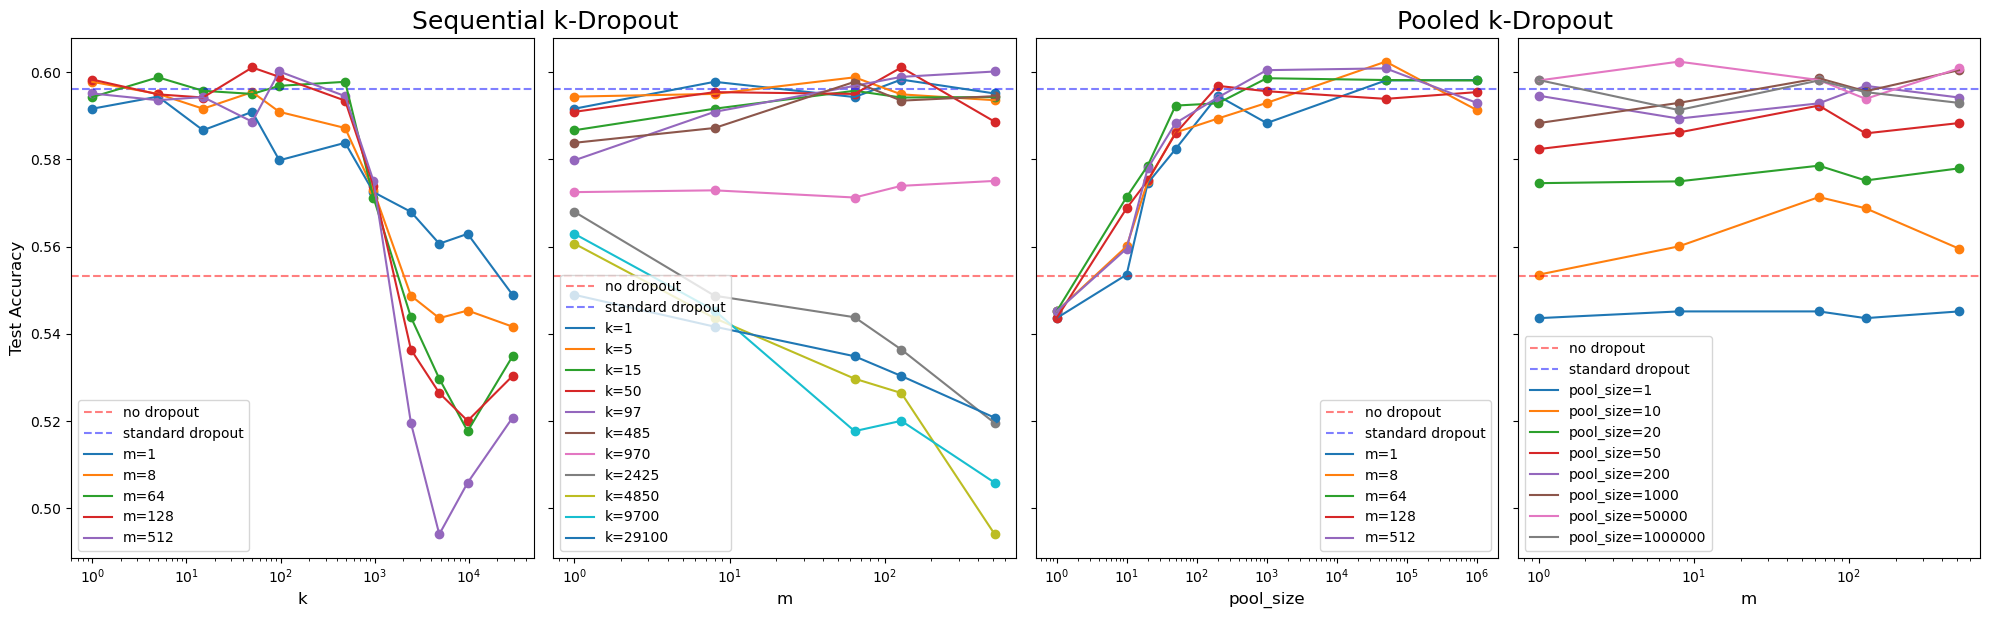

In [10]:
# the four previous plots combined into one figure
label_size = 12
fig, ax = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# hlines
df_bench_no = get_sweep_dataframe('6sxbqxn3')
df_bench_std = get_sweep_dataframe('1xiu49jn')
no_acc = df_bench_no.test_acc.mean()
std_acc = df_bench_std.test_acc.mean()
for a in ax:
    a.axhline(y=no_acc, color='red', linestyle='--', alpha=.5, label='no dropout')
    a.axhline(y=std_acc, color='blue', linestyle='--', alpha=.5, label='standard dropout')

# sequential k
for m in df_seq.m.unique():
    df_filtered = df_seq[df_seq.m == m]
    ax[0].scatter(df_filtered.k, df_filtered.test_acc)
    ax[0].plot(df_filtered.k, df_filtered.test_acc, label=f'm={m}')

ax[0].set_xscale('log')
ax[0].set_xlabel('k', fontsize=label_size)
ax[0].set_ylabel('Test Accuracy', fontsize=label_size)
ax[0].legend(fontsize=10, loc='lower left');

# sequential m
for k in df_seq.k.unique():
    df_filtered = df_seq[df_seq.k == k]
    ax[1].scatter(df_filtered.m, df_filtered.test_acc)
    ax[1].plot(df_filtered.m, df_filtered.test_acc, label=f'k={k}')

ax[1].set_xscale('log')
ax[1].set_xlabel('m', fontsize=label_size)
ax[1].legend(fontsize=10, loc='lower left');

# pooled pool size
for m in df_pool.m.unique():
    df_filtered = df_pool[df_pool.m == m]
    ax[2].scatter(df_filtered.pool_size, df_filtered.test_acc)
    ax[2].plot(df_filtered.pool_size, df_filtered.test_acc, label=f'm={m}')

ax[2].set_xscale('log')
ax[2].set_xlabel('pool_size', fontsize=label_size)
ax[2].legend(fontsize=10, loc='lower right');

# pooled m
for pool_size in df_pool.pool_size.unique():
    df_filtered = df_pool[df_pool.pool_size == pool_size]
    ax[3].scatter(df_filtered.m, df_filtered.test_acc)
    ax[3].plot(df_filtered.m, df_filtered.test_acc, label=f'pool_size={pool_size}')

ax[3].set_xscale('log')
ax[3].set_xlabel('m', fontsize=label_size)
ax[3].legend(fontsize=10, loc='lower left');

# titles
fig.text(0.275, 0.99, 'Sequential k-Dropout', ha='center', fontsize=18)
fig.text(0.755, 0.99, 'Pooled k-Dropout', ha='center', fontsize=18)

fig.tight_layout()

In [11]:
df_bench_no = get_sweep_dataframe('6sxbqxn3')
df_bench_std = get_sweep_dataframe('1xiu49jn')
df_bench_k1_m1 = get_sweep_dataframe('17onv410')
df_bench_seq_1 = get_sweep_dataframe('2pnf6l0e')  # initial sweep
df_bench_seq_2 = get_sweep_dataframe('rwxv6n0g')  # lower k values
df_bench_seq = pd.concat([df_bench_seq_1, df_bench_seq_2]).reset_index()
df_bench_seq.sort_values(['k', 'm'], inplace=True, ascending=[True, False])
df_bench_pool = get_sweep_dataframe('n1qjw2ag')

len(df_bench_no), len(df_bench_std), len(df_bench_k1_m1), len(df_bench_seq), len(df_bench_pool)

(5, 5, 5, 40, 10)

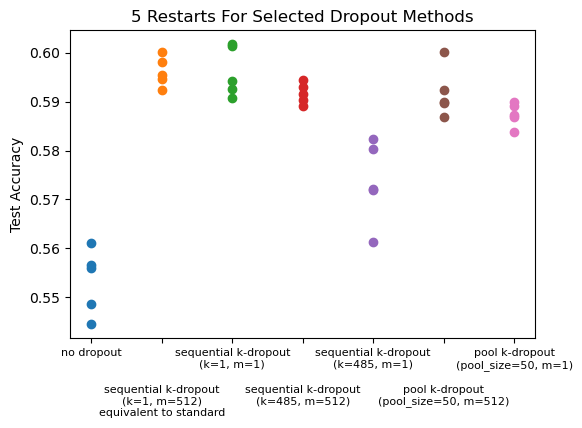

In [12]:
ks = [485]  # NOTE: skipping 5, 97, 29100
seq_ms = [512, 1]

pool_sizes = [50]
pool_ms = [512, 1]

plt.figure(figsize=(6, 4))

# no dropout
plt.scatter(['no dropout' for _ in range(len(df_bench_no))], df_bench_no.test_acc)

# standard dropout
plt.scatter(['sequential k-dropout\n(k=1, m=512)\nequivalent to standard' for _ in range(len(df_bench_std))], df_bench_std.test_acc)

# sequential k dropout
plt.scatter(['sequential k-dropout\n(k=1, m=1)' for _ in range(len(df_bench_k1_m1))], df_bench_k1_m1.test_acc)
for k in ks:
    for m in seq_ms:
        df_filtered = df_bench_seq[(df_bench_seq.k == k) & (df_bench_seq.m == m)]
        plt.scatter([f'sequential k-dropout\n(k={k}, m={m})' for _ in range(len(df_filtered))], df_filtered.test_acc)

# pooled k dropout
for pool_size in pool_sizes:
    for m in pool_ms:
        df_filtered = df_bench_pool[(df_bench_pool.pool_size == pool_size) & (df_bench_pool.m == m)]
        plt.scatter([f'pool k-dropout\n(pool_size={pool_size}, m={m})' for _ in range(len(df_filtered))], df_filtered.test_acc)

plt.title('5 Restarts For Selected Dropout Methods')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=0, fontsize=8);
for tick in plt.gca().xaxis.get_major_ticks()[1::2]:
    tick.set_pad(30)

## Sequential Training Dynamics

In [13]:
subnet_run_info = (
    (6, 'nbtyh4if'),  # k=4850, 6 masks
    (12, '46z6q7cg'),  # k=2425, 12 masks
    (30, 'eboeg7dc'),  # k=970, 30 masks
    (60, '283zn3jw'),  # k=485, 60 masks
    (300, 'ctyh712x'),  # k=97, 300 masks
    (1940, 'm27syi1o'),  # k=15, 1940 masks NOTE: not saving subnet performance over the source of training
)
run_id_std_dropout = 'p2ng3zsl'
run_id_no_dropout = '4bylddzu'

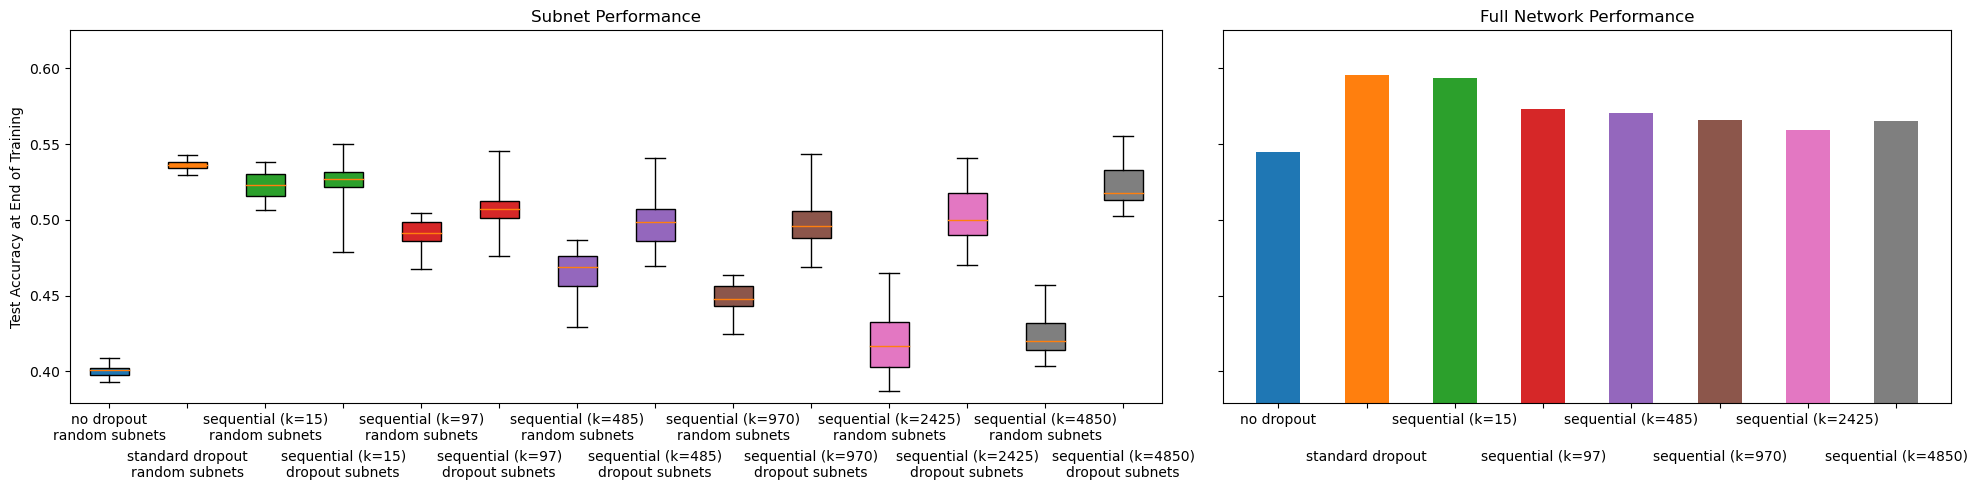

In [14]:
plot_subnet_boxplots([ri[1] for ri in subnet_run_info[::-1]], run_id_std_dropout, run_id_no_dropout,
                     figsize=(20, 5), offset_full_ticks=True, width_ratios=(1.5, 1))

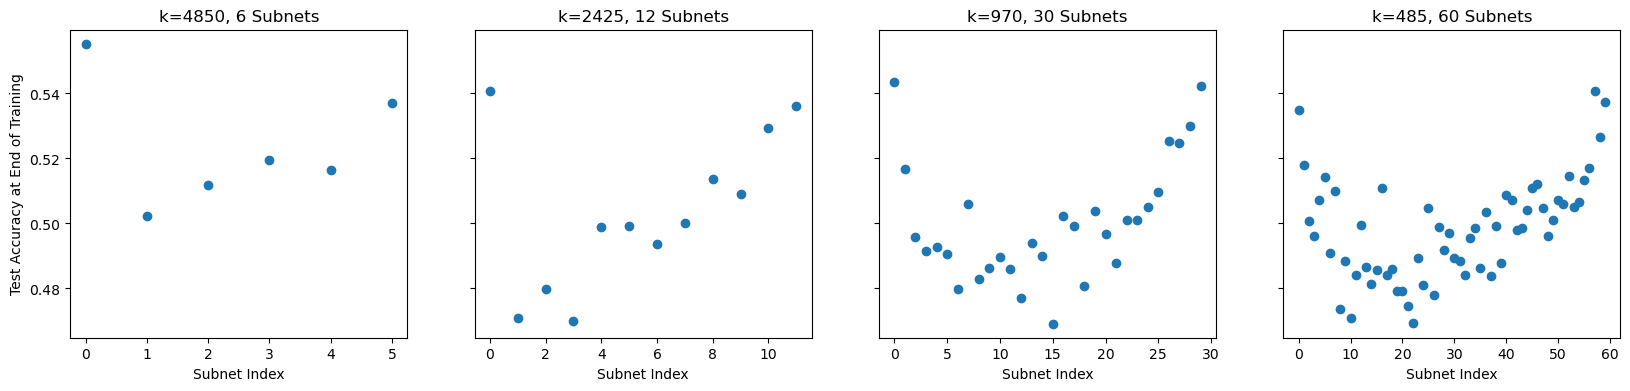

In [15]:
# 'cup' plot
cup_info = subnet_run_info[:4]
fig, axes = plt.subplots(1, 4, figsize=(20, 4), sharey=True)

for i, ((n_masks, run_id), ax) in enumerate(zip(cup_info, axes)):
    run_config = get_run_config(run_id)
    k = run_config['k']
    m = run_config['m']
    epochs = run_config['epochs']
    n_masks = epochs * BATCHES_PER_EPOCH // k

    mask_cols = [f'test_acc_mask_{i}' for i in range(n_masks)]
    summary = get_run_summary(run_id)
    mask_values = [summary[c] for c in mask_cols]

    ax.scatter(range(n_masks), mask_values)
    ax.set_xlabel('Subnet Index')
    ax.set_title(f'k={k}, {n_masks} Subnets')

    if i == 0:
        ax.set_ylabel('Test Accuracy at End of Training')

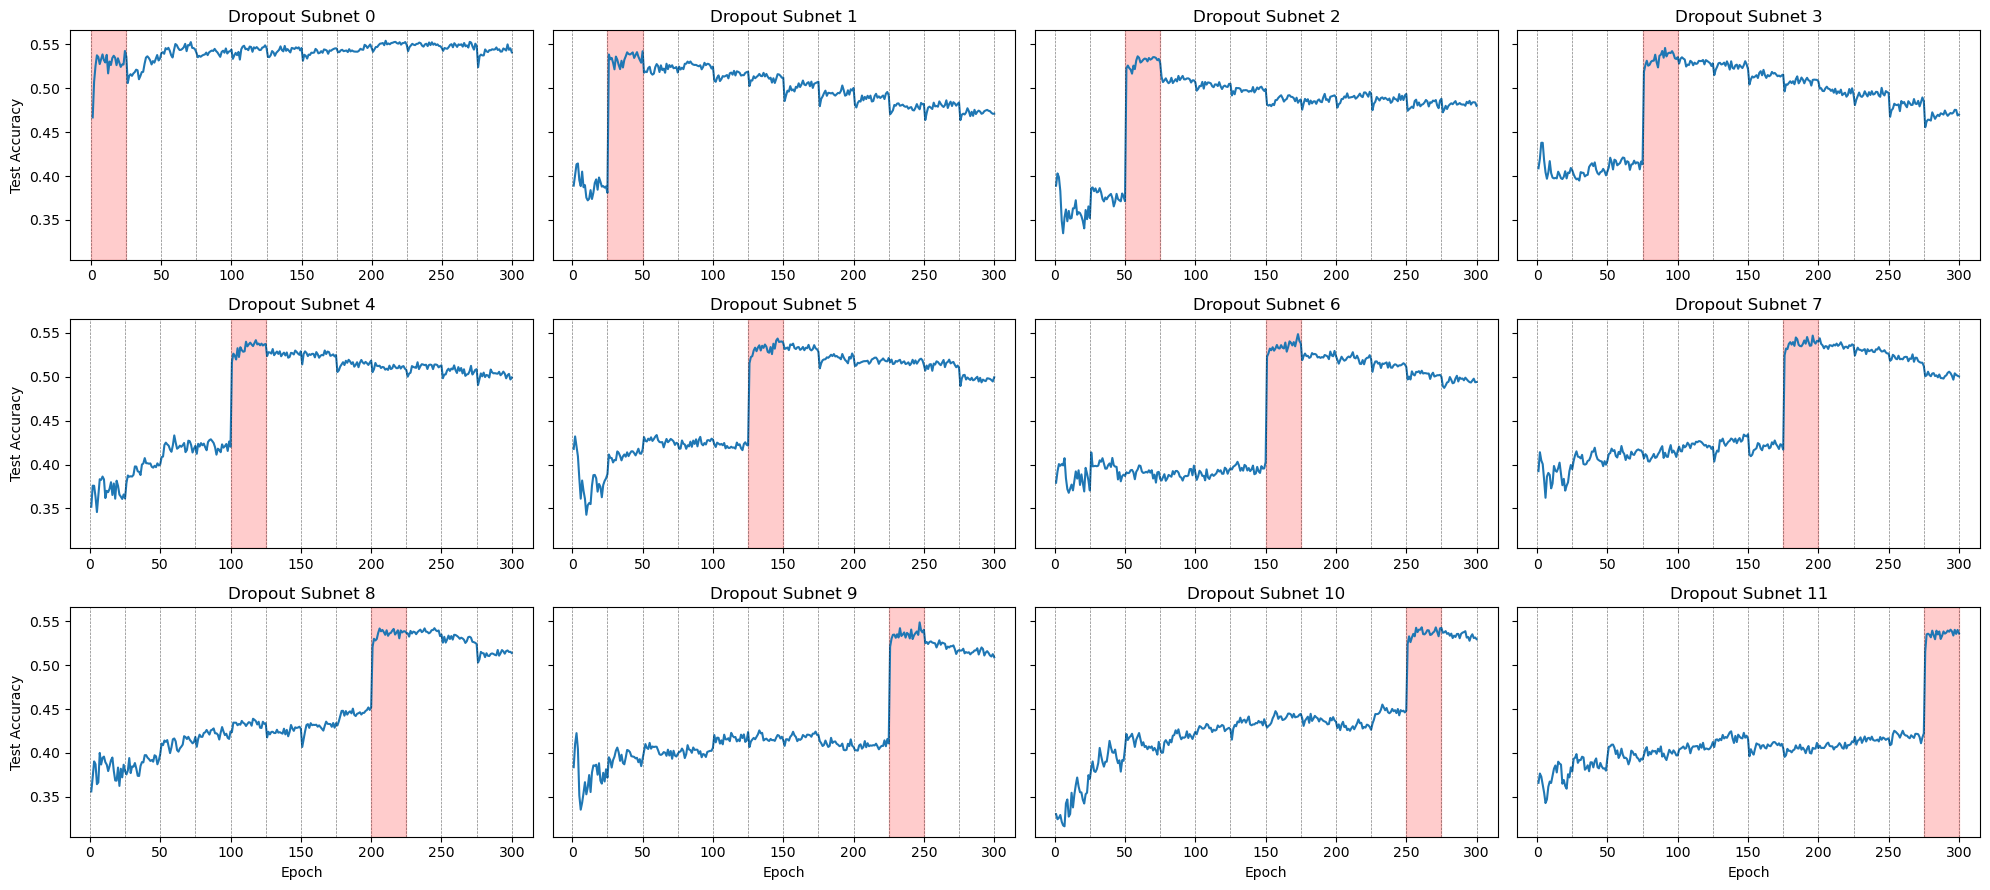

In [16]:
# red band plots
plot_subnet_training('46z6q7cg', n_cols=4, row_size=3)  # k=2425

## Pooled Training Dynamics

In [5]:
DROPOUT_SUBNET_CSV = "./csv_files/dropout_subnet_acc.csv"
POOLED_RANDOM_SUBNET_CSV = "./csv_files/pooled_random_subnet_acc.csv"
POOLED_POOL_SUBNET_CSV = "./csv_files/pooled_pool_subnet_acc.csv"

In [6]:
def read_csv(csv_path):
    data = []
    with open(csv_path) as csvfile:
        csvreader = csv.DictReader(csvfile)
        for idx, row in enumerate(csvreader):
            data.append(row)

    return data

In [7]:
dropout_subnets = read_csv(DROPOUT_SUBNET_CSV)

sweep_id = "msekknsh"
ensemble_df = get_sweep_dataframe(sweep_id)

dropout_subnets = [float(x["Test Accuracy"]) for x in read_csv(DROPOUT_SUBNET_CSV)]
pooled_random_subnets = [float(x["Test Accuracy"]) for x in read_csv(POOLED_RANDOM_SUBNET_CSV)]
pooled_pool_subnets = [float(x["Test Accuracy"]) for x in read_csv(POOLED_POOL_SUBNET_CSV)]
ensemble_subnets = list(ensemble_df["test_acc"])

dropout_net = 0.5940583881578947
pool_net = 0.5894325657894737
independent_ensemble = 0.623046875

In [20]:
# get the bars for no dropout and standard dropout
rconf_std = get_run_config(run_id_std_dropout)
rconf_no = get_run_config(run_id_no_dropout)
summary_std = get_run_summary(run_id_std_dropout)
summary_no = get_run_summary(run_id_no_dropout)

n_std_random_subnets = rconf_std['n_random_subnets']
n_no_random_subnets = rconf_no['n_random_subnets']

rand_std_cols = [f'test_acc_random_{i}' for i in range(n_std_random_subnets)]
rand_no_cols = [f'test_acc_random_{i}' for i in range(n_no_random_subnets)]

rand_std_values = [summary_std[c] for c in rand_std_cols]
rand_no_values = [summary_no[c] for c in rand_no_cols]

all_values = [rand_no_values, rand_std_values]
colors = ['C0', 'C1']
labels = ['no dropout\nrandom subnets', 'standard dropout\nrandom subnets']

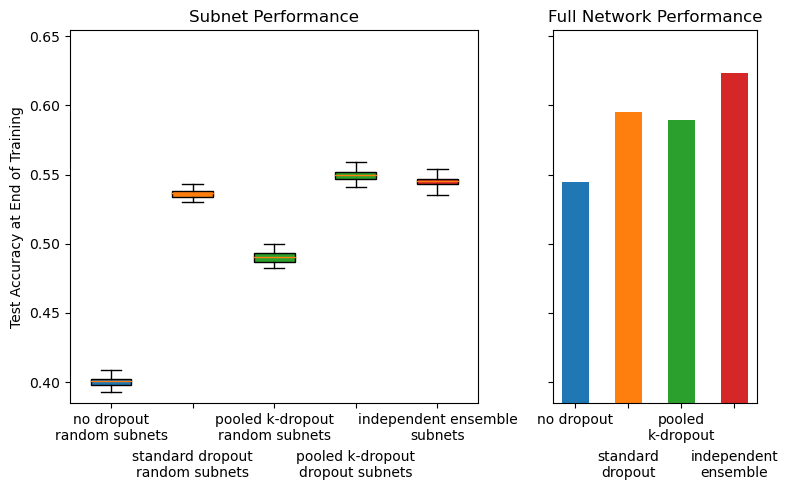

In [21]:
# pooled and standard dropout subnet performance
fig, ax = plt.subplots(1, 2, figsize=(8, 5), sharey=True, width_ratios=(2, 1))

# boxplot
[ensemble_subnets, pooled_random_subnets, pooled_pool_subnets]

values = [rand_no_values, rand_std_values, pooled_random_subnets, pooled_pool_subnets, ensemble_subnets]
labels = ['no dropout\nrandom subnets', 'standard dropout\nrandom subnets', 'pooled k-dropout\nrandom subnets', 'pooled k-dropout\ndropout subnets', 'independent ensemble\nsubnets']
colors = ['C0', 'C1', 'C2', 'C2', 'C3']
bp = ax[0].boxplot(values, whis=10, patch_artist=True)
ax[0].set_xticklabels(labels, rotation=0, fontsize=10)
ax[0].set_ylabel('Test Accuracy at End of Training')
for tick in ax[0].xaxis.get_major_ticks()[1::2]:
    tick.set_pad(30)
bottom = ax[0].get_ylim()[0]
ax[0].set_title('Subnet Performance')
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
# TODO: colors

# barchart
bars = [summary_no[f'test_acc_full'], summary_std[f'test_acc_full']]
bars += [pool_net, independent_ensemble]
labels = ['no dropout', 'standard\ndropout', 'pooled\nk-dropout', 'independent\nensemble']
colors = ['C0', 'C1', 'C2', 'C3']
ax[1].bar(range(4), bars, color=colors, width=0.5)
ax[1].set_xticks(range(4), labels, fontsize=10)
ax[1].set_title('Full Network Performance')
ax[1].set_ylim(bottom=bottom)
for tick in ax[1].xaxis.get_major_ticks()[1::2]:
    tick.set_pad(30)

fig.tight_layout()

In [11]:
len(sequential_subnet_ensemble_acc)

2

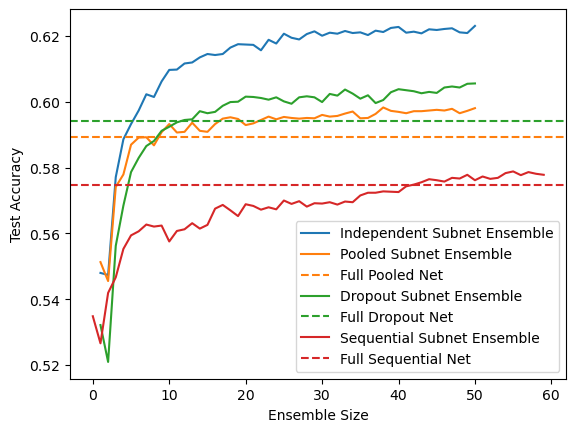

In [12]:
# pooled ensembles
x = list(range(1,51))
pooled_subnet_ensemble_acc = [0.5512952302631579, 0.5455386513157895, 0.5741159539473685, 0.5779194078947368, 0.5869654605263158, 0.589124177631579, 0.5892269736842105, 0.5867598684210527, 0.5907689144736842, 0.5932360197368421, 0.5906661184210527, 0.5908717105263158, 0.5936472039473685, 0.5911800986842105, 0.5908717105263158, 0.5932360197368421, 0.5948807565789473, 0.5952919407894737, 0.5947779605263158, 0.5929276315789473, 0.5934416118421053, 0.594469572368421, 0.5954975328947368, 0.5946751644736842, 0.5953947368421053, 0.5950863486842105, 0.5948807565789473, 0.5950863486842105, 0.594983552631579, 0.5960115131578947, 0.5954975328947368, 0.595703125, 0.596422697368421, 0.5970394736842105, 0.594983552631579, 0.5950863486842105, 0.5963199013157895, 0.5982730263157895, 0.5972450657894737, 0.596936677631579, 0.5965254934210527, 0.5971422697368421, 0.5971422697368421, 0.5973478618421053, 0.5975534539473685, 0.5973478618421053, 0.5978618421052632, 0.5965254934210527, 0.5972450657894737, 0.5980674342105263]
independent_esemble_acc = [0.5480057565789473, 0.5473889802631579, 0.5770970394736842, 0.588610197368421, 0.5932360197368421, 0.5973478618421053, 0.602282072368421, 0.6014597039473685, 0.606188322368421, 0.6096833881578947, 0.6097861842105263, 0.6116365131578947, 0.6119449013157895, 0.6134868421052632, 0.614514802631579, 0.6142064144736842, 0.614514802631579, 0.616467927631579, 0.6174958881578947, 0.6173930921052632, 0.6172902960526315, 0.6156455592105263, 0.6188322368421053, 0.6177014802631579, 0.6206825657894737, 0.6194490131578947, 0.6189350328947368, 0.6205797697368421, 0.6214021381578947, 0.6200657894736842, 0.6209909539473685, 0.6206825657894737, 0.6215049342105263, 0.6208881578947368, 0.62109375, 0.6202713815789473, 0.6216077302631579, 0.6211965460526315, 0.6224300986842105, 0.6227384868421053, 0.6209909539473685, 0.6212993421052632, 0.6207853618421053, 0.6220189144736842, 0.621813322368421, 0.6221217105263158, 0.622327302631579, 0.62109375, 0.6208881578947368, 0.623046875]
dropout_subet_ensemble_acc = [0.5321751644736842, 0.5209703947368421, 0.5562294407894737, 0.5684621710526315, 0.5786389802631579, 0.5829564144736842, 0.5865542763157895, 0.5880962171052632, 0.5911800986842105, 0.5924136513157895, 0.59375, 0.594469572368421, 0.5946751644736842, 0.5971422697368421, 0.5965254934210527, 0.596936677631579, 0.5987870065789473, 0.5999177631578947, 0.6000205592105263, 0.6015625, 0.6014597039473685, 0.6011513157894737, 0.6006373355263158, 0.6013569078947368, 0.6001233552631579, 0.5994037828947368, 0.6013569078947368, 0.6016652960526315, 0.6013569078947368, 0.5999177631578947, 0.6023848684210527, 0.6018708881578947, 0.6037212171052632, 0.6024876644736842, 0.6009457236842105, 0.6019736842105263, 0.599609375, 0.6005345394736842, 0.6028988486842105, 0.6038240131578947, 0.603515625, 0.6032072368421053, 0.6025904605263158, 0.6030016447368421, 0.6026932565789473, 0.6043379934210527, 0.6046463815789473, 0.6043379934210527, 0.60546875, 0.6055715460526315]
sequential_subnet_ensemble_acc = [0.5348478618421050 ,0.526624177631579 ,0.5419407894736840 ,0.5466694078947370 ,0.5553042763157900 ,0.5594161184210530 ,0.5606496710526320 ,0.5627055921052630 ,0.5620888157894740 ,0.5623972039473690 ,0.5575657894736840 ,0.5607524671052630 ,0.561266447368421 ,0.5631167763157900 ,0.5614720394736840 ,0.5626027960526320 ,0.5675370065789470 ,0.5686677631578950 ,0.5670230263157900 ,0.5652754934210530 ,0.5688733552631580 ,0.568359375 ,0.5672286184210530 ,0.5679481907894740 ,0.5673314144736840 ,0.5700041118421050 ,0.5689761513157900 ,0.5697985197368420 ,0.5681537828947370 ,0.5691817434210530 ,0.569078947368421 ,0.5694901315789470 ,0.5687705592105260 ,0.5696957236842110 ,0.5694901315789470 ,0.571546052631579 ,0.5723684210526320 ,0.5723684210526320 ,0.5727796052631580 ,0.5726768092105260 ,0.5725740131578950 ,0.5743215460526320 ,0.5748355263157900 ,0.5755550986842110 ,0.5764802631578950 ,0.576171875 ,0.5757606907894740 ,0.576891447368421 ,0.5766858552631580 ,0.5778166118421050 ,0.576171875 ,0.5773026315789470 ,0.5765830592105260 ,0.576891447368421 ,0.5783305921052630 ,0.578844572368421 ,0.5777138157894740 ,0.5786389802631580 ,0.578125 ,0.5778166118421050]

sequential_model_acc = 0.5746

plt.plot(x, independent_esemble_acc, label="Independent Subnet Ensemble")
plt.plot(x, pooled_subnet_ensemble_acc, label="Pooled Subnet Ensemble", color='C1')
plt.axhline(pool_net, color='C1', xmin=0, xmax=50, linestyle="--", label="Full Pooled Net")
plt.plot(x, dropout_subet_ensemble_acc, label="Dropout Subnet Ensemble", color='C2')
plt.axhline(dropout_net, color='C2', xmin=0, xmax=50, linestyle="--", label="Full Dropout Net")
plt.plot(list(range(len(sequential_subnet_ensemble_acc))), sequential_subnet_ensemble_acc, label="Sequential Subnet Ensemble", color='C3')
plt.axhline(sequential_model_acc, color='C3', xmin=0, xmax=60, linestyle="--", label="Full Sequential Net")

plt.xlabel("Ensemble Size")
plt.ylabel("Test Accuracy")
plt.legend()

## Appendix

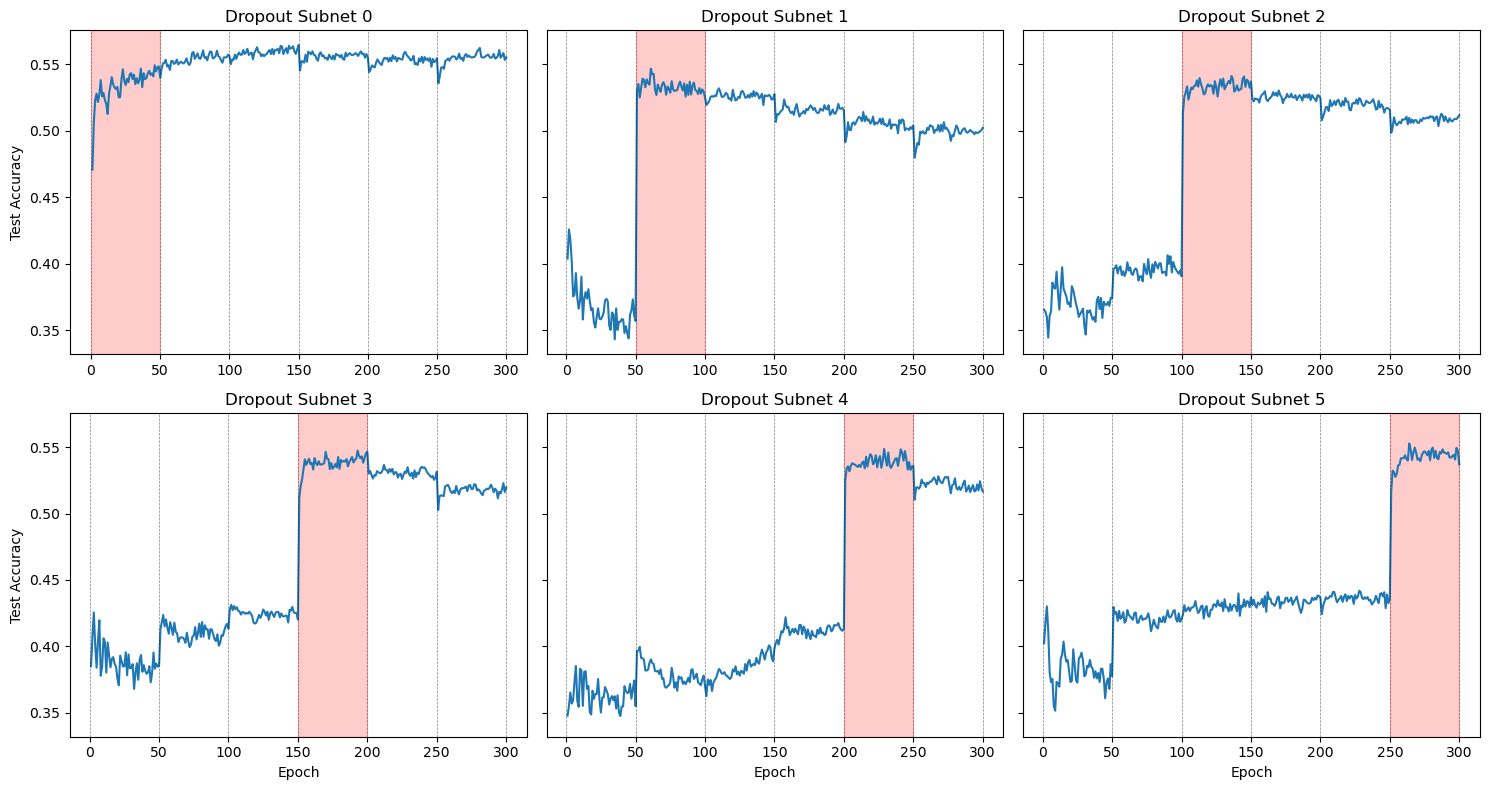

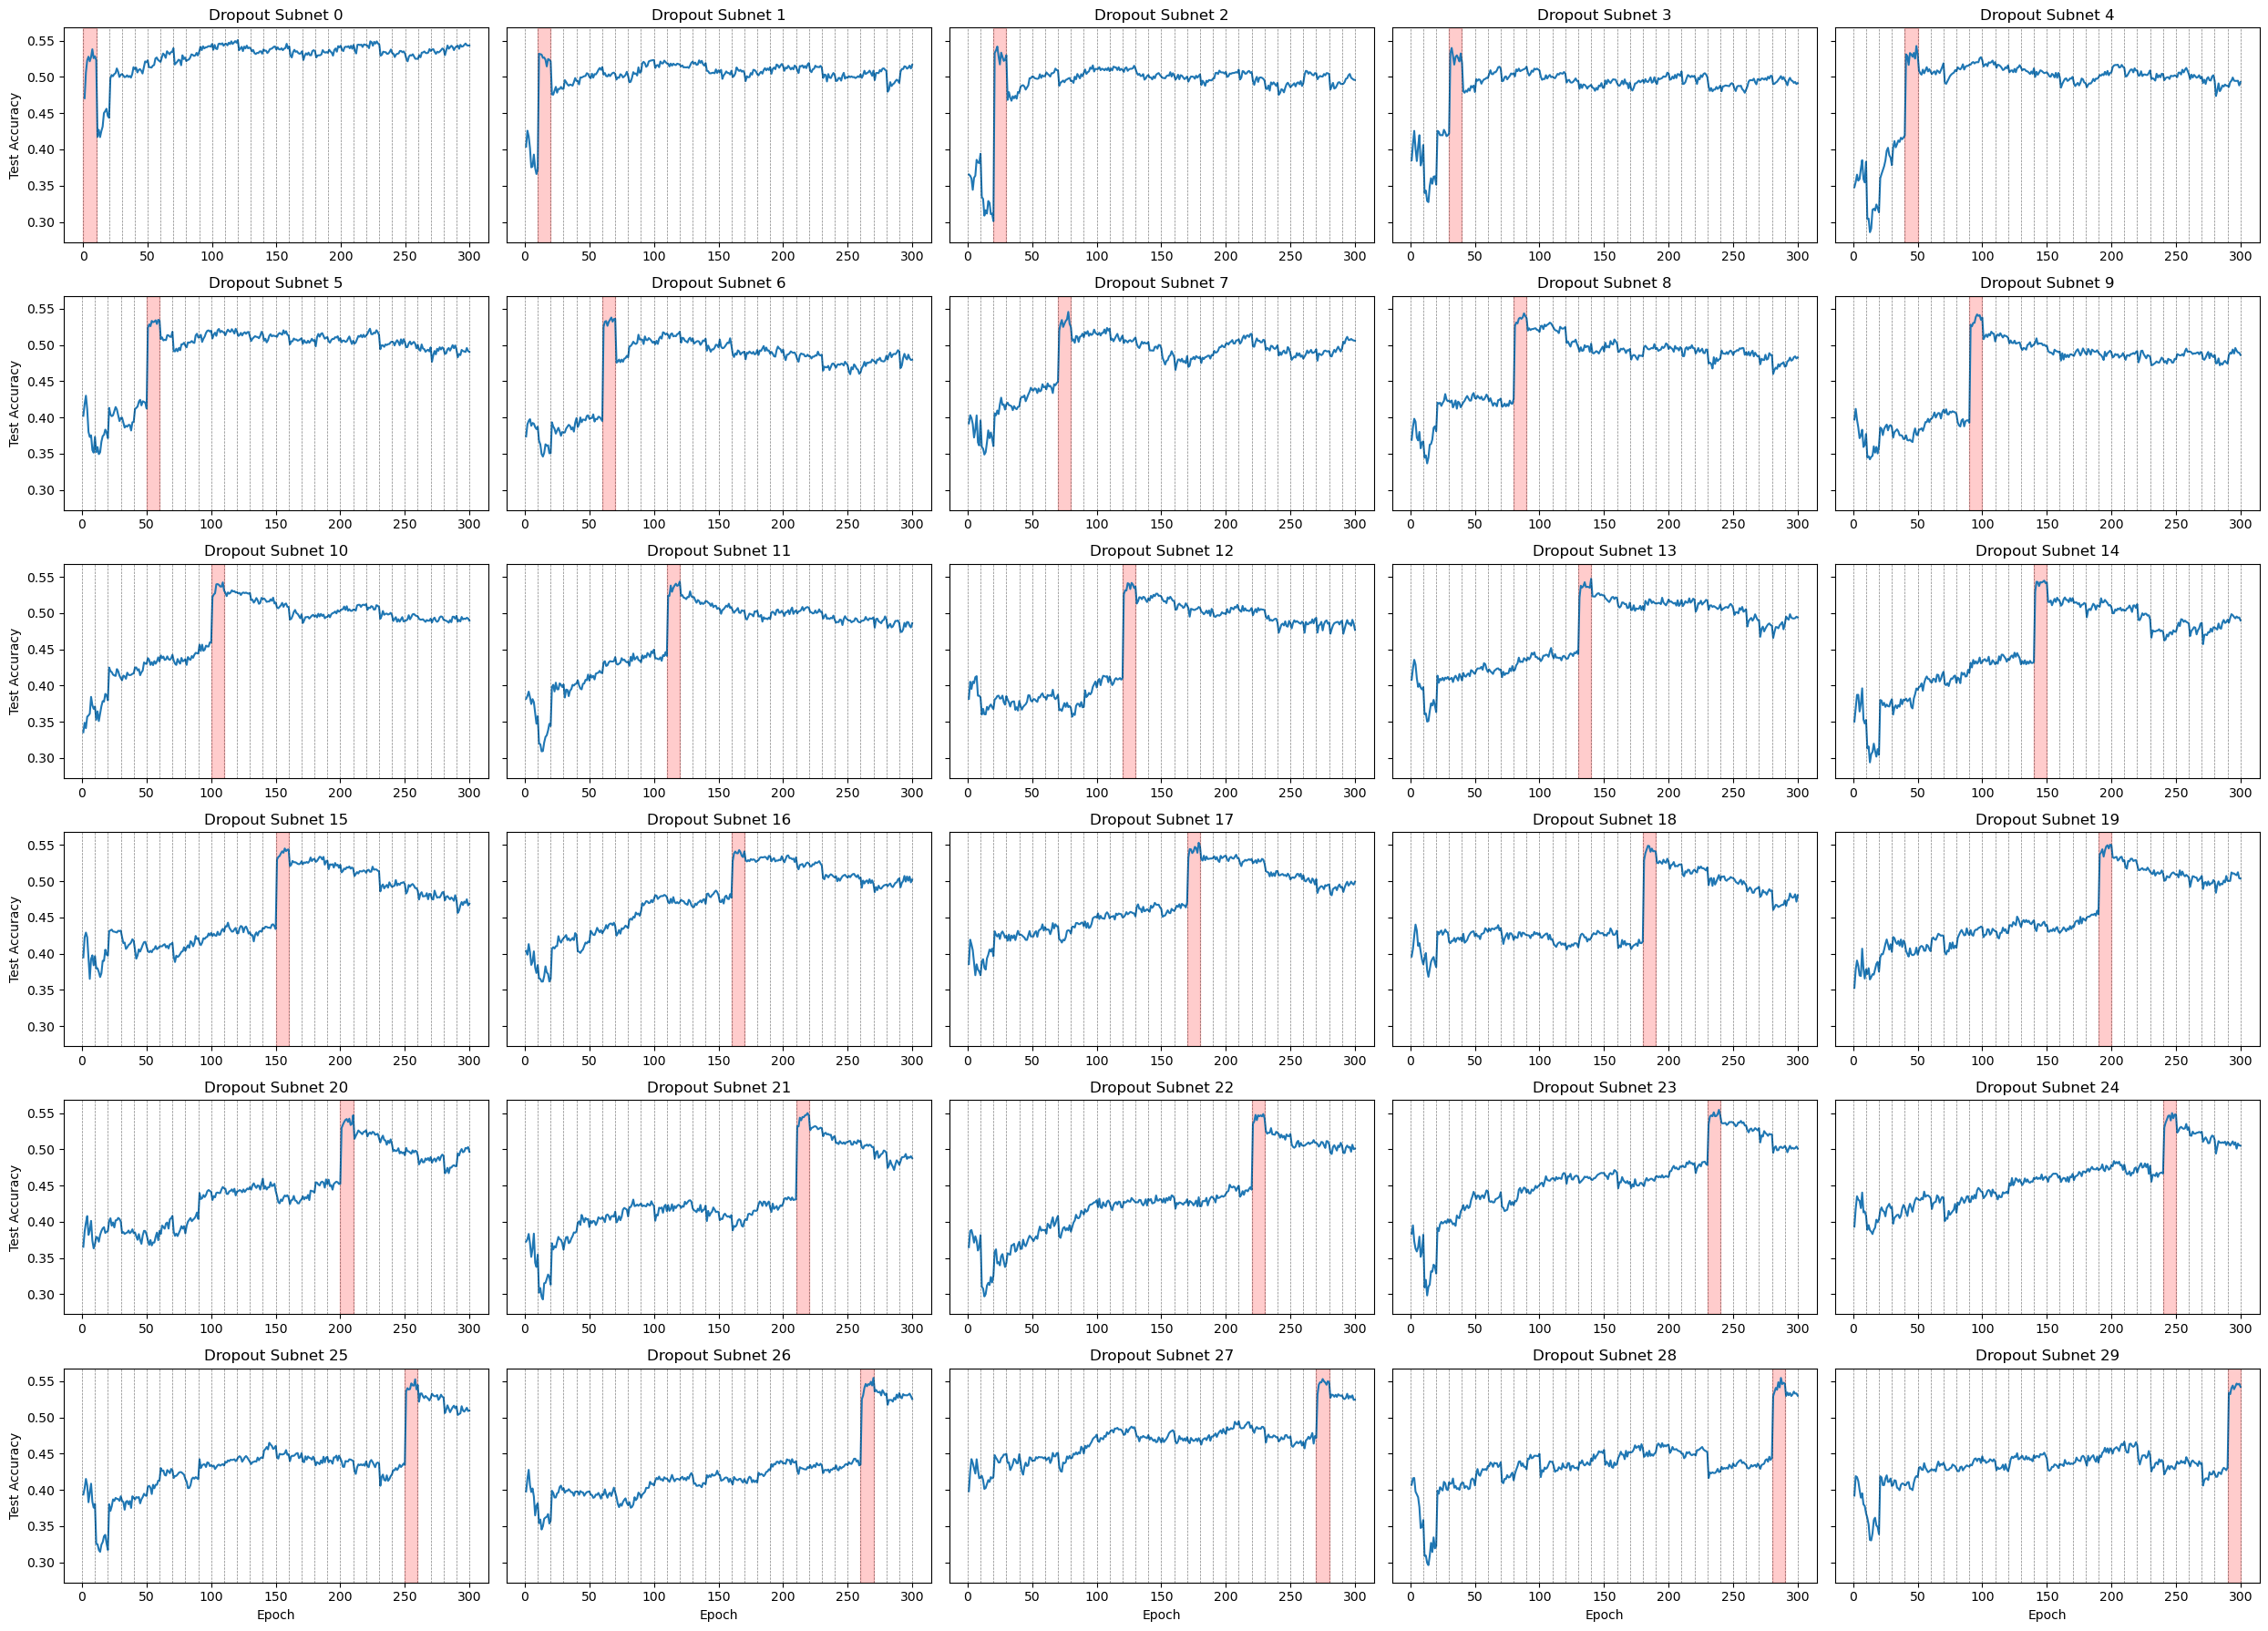

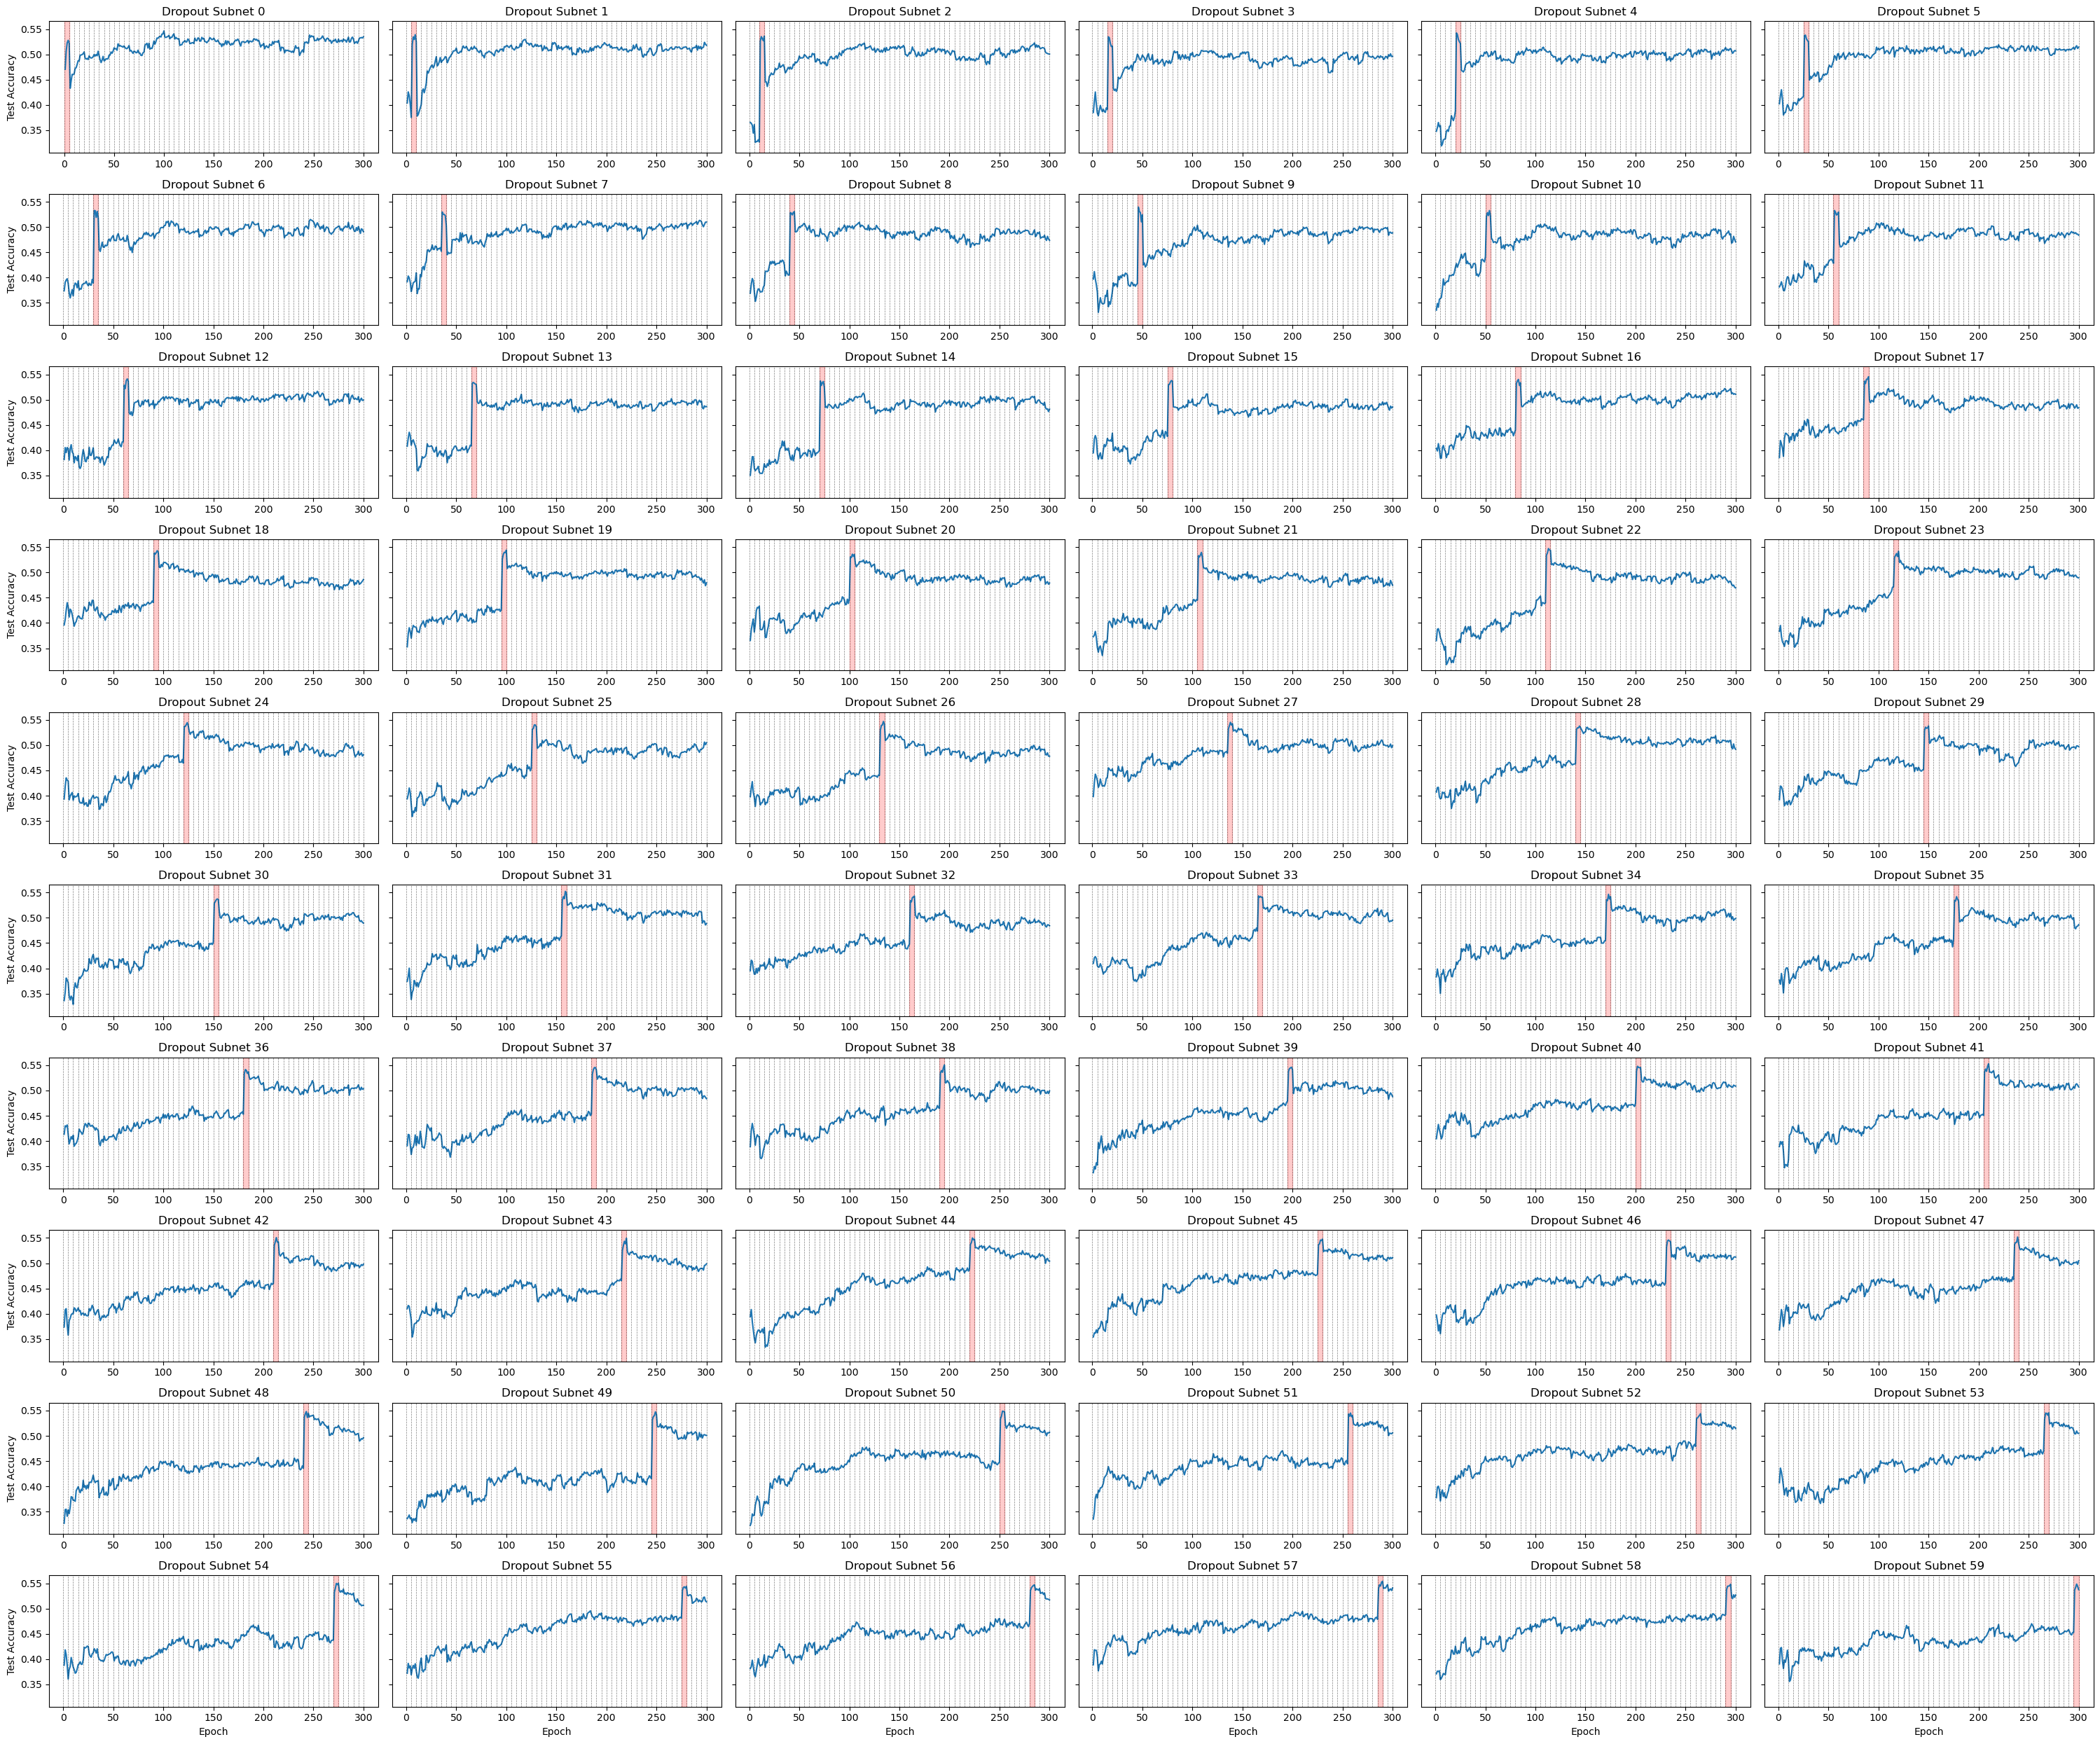

In [23]:
# all red band plots and full network plots
plot_subnet_training('nbtyh4if')  # k=4850, 6 masks
plot_subnet_training('eboeg7dc', n_cols=5, row_size=3)  # k=970, 30 masks
plot_subnet_training('283zn3jw', n_cols=6, row_size=2.5)  # k=485, 60 masks